<a href="https://colab.research.google.com/github/Rahul-Pal-1/Test/blob/main/final_DDoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.io import arff

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
file = arff.loadarff("/content/drive/MyDrive/final-dataset.arff")
data = pd.DataFrame(file[0])
df = data.sample(n=400000,random_state=12)

In [ ]:
data.PKT_CLASS

0             b'Normal'
1             b'Normal'
2          b'UDP-Flood'
3             b'Normal'
4             b'Normal'
               ...     
2160663       b'Normal'
2160664       b'Normal'
2160665       b'Normal'
2160666       b'Normal'
2160667       b'Normal'
Name: PKT_CLASS, Length: 2160668, dtype: object

In [ ]:
# cnt = 0
# for i in data:
#   print(data[i]).where(data['PKT_CLASS'] != "b'Normal'")

In [ ]:
data['PKT_CLASS'].value_counts()

b'Normal'        1935959
b'UDP-Flood'      201344
b'Smurf'           12590
b'SIDDOS'           6665
b'HTTP-FLOOD'       4110
Name: PKT_CLASS, dtype: int64

In [ ]:
# df['PKT_CLASS'].value_counts()

In [ ]:
# df['PKT_CLASS'].value_counts().plot(kind='bar')

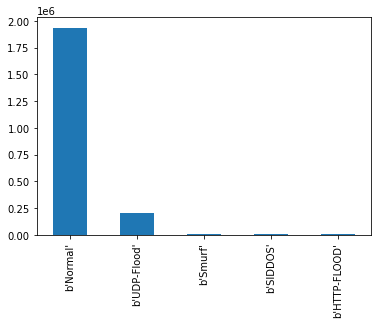

In [ ]:
data['PKT_CLASS'].value_counts().plot(kind='bar')

In [ ]:
data

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,24.10,10.00,43184.0,22.0,10.0,b'ack',55.0,b'-------',11.0,1343.0,...,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,1.030013,50.040562,b'Normal'
2160664,24.12,12.00,376386.0,23.0,22.0,b'ack',55.0,b'-------',13.0,10991.0,...,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,1.030026,50.051067,b'Normal'
2160665,1.00,24.10,140121.0,21.0,23.0,b'tcp',1540.0,b'-------',2.0,4374.0,...,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,1.000000,50.013418,b'Normal'
2160666,5.00,24.50,26800.0,5.0,21.0,b'tcp',1540.0,b'-------',6.0,832.0,...,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,1.000000,50.027339,b'Normal'


In [ ]:
# data.columns

In [ ]:
# pd.set_option('max_column', None)
# pd.set_option('max_row', 20)
# data

In [ ]:
# data.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();
label = le.fit_transform(df['PKT_CLASS'])


In [ ]:
label.size

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
labels=np.array(df["PKT_CLASS"])
val=np.array(data[0:-1])

In [ ]:
# value=pd.DataFrame(val) # to make value a data frame of data in val so that we can use data frame function
# vals=val.drop(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], axis=1)


value=df.drop(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], axis=1)
vals=np.array(value)

In [ ]:
vals


array([[2.4500000e+01, 5.0000000e+00, 3.7235500e+05, ..., 3.4220226e+01,
        1.0300420e+00, 5.0057349e+01],
       [1.0000000e-01, 2.4200000e+01, 6.2637000e+05, ..., 6.8990240e+01,
        2.5000000e+01, 7.5022240e+01],
       [3.0000000e+00, 2.4300000e+01, 5.6119000e+05, ..., 4.8704594e+01,
        1.0000000e+00, 5.0021920e+01],
       ...,
       [2.4800000e+01, 8.0000000e+00, 2.2083000e+05, ..., 2.2036118e+01,
        1.0300540e+00, 5.0061864e+01],
       [2.0000000e+00, 2.4200000e+01, 1.6864800e+05, ..., 1.7124926e+01,
        1.0000000e+00, 5.0018467e+01],
       [9.1000000e+00, 2.4290000e+01, 2.6883800e+05, ..., 2.6279723e+01,
        2.5000000e+01, 7.5023680e+01]])

In [ ]:
# val
labels

array([b'Normal', b'Normal', b'Normal', ..., b'Normal', b'Normal',
       b'Normal'], dtype=object)

In [ ]:
# for lab in data:
#   print(lab[0:-1])

In [ ]:
# vals=[val[0:-1] for val in data[]]
# labels=[lab[-1] for lab in data]

In [ ]:
# labels

In [ ]:
# for i in labels:
#   print(type(i))

In [ ]:
# da=set(labels)
# brac=600
# templ=[]
# tempd=[]
# for i in da:
#   con=0
#   while con<brac:
#     for j in range(len(labels)):
#       if labels[j]:
#         templ.append(labels[j])
#         tempd.append(vals[j])
#         con+=1
#       if con == brac:
#         break
# vals=tempd
# labels=templ

In [ ]:
# l=len(vals)
# print(l)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(vals,label,stratify=label,test_size=.2,random_state=0)

In [ ]:
# X_train1 = pd.DataFrame(Y_train)

In [ ]:
# Y_train

In [ ]:
# X_train2 = X_train1.drop(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO'], axis=1)

In [ ]:
# tstlen=len(X_train1)
# print(tstlen)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
y_train=np.array(Y_train)
y_test=np.array(Y_test)

In [ ]:
# y_test.value_counts()

AttributeError: ignored

In [ ]:
print(len(X_train), len(x_train), len(Y_train), len(X_test), len(x_test), len(Y_test))

320000 320000 320000 80000 80000 80000


In [ ]:
pd.set_option('max_row', None)
# value.dtypes  # ans get is all float 64
labels.dtype

dtype('O')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  145,     2,     6,     2,     0],
       [    4, 70492,    20,   363,   790],
       [    6,    23,   202,    14,     1],
       [    0,   317,    10,   148,     1],
       [    0,   718,     0,     2,  6734]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       155
           1       0.99      0.98      0.98     71669
           2       0.85      0.82      0.83       246
           3       0.28      0.31      0.29       476
           4       0.89      0.90      0.90      7454

    accuracy                           0.97     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.97      0.97      0.97     80000



In [ ]:
# from sklearn.metrics import f1_score
# f1_score(y_test, y_pred, average='weighted')

In [ ]:
print((accuracy_score(y_pred,y_test))*100,'%')

97.15125 %


In [ ]:
clf=SVC(kernel="rbf")
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  145,     0,     6,     4,     0],
       [    4, 71658,     7,     0,     0],
       [    0,    13,   233,     0,     0],
       [    0,   318,    12,   146,     0],
       [    0,   725,     0,     0,  6729]])

In [ ]:
print((accuracy_score(y_pred,y_test))*100,'%')

98.63875 %


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       155
           1       0.99      1.00      0.99     71669
           2       0.90      0.95      0.92       246
           3       0.97      0.31      0.47       476
           4       1.00      0.90      0.95      7454

    accuracy                           0.99     80000
   macro avg       0.97      0.82      0.86     80000
weighted avg       0.99      0.99      0.99     80000



In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test)


In [ ]:
print((accuracy_score(y_pred,y_test))*100,'%')


98.6275 %


In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  137,     2,     6,    10,     0],
       [    4, 71658,     7,     0,     0],
       [    0,    14,   232,     0,     0],
       [    0,   318,    12,   146,     0],
       [    0,   725,     0,     0,  6729]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       155
           1       0.99      1.00      0.99     71669
           2       0.90      0.94      0.92       246
           3       0.94      0.31      0.46       476
           4       1.00      0.90      0.95      7454

    accuracy                           0.99     80000
   macro avg       0.96      0.81      0.85     80000
weighted avg       0.99      0.99      0.99     80000



In [ ]:
Gclassifier = GaussianNB()
Gclassifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = Gclassifier.predict(x_test)

In [ ]:
print((accuracy_score(y_pred,y_test))*100,'%')

96.95125 %


In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[  149,     0,     6,     0,     0],
       [   11, 70443,     9,  1204,     2],
       [    0,    13,   230,     3,     0],
       [  146,   308,    12,    10,     0],
       [    0,   718,     0,     7,  6729]])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.96      0.65       155
           1       0.99      0.98      0.98     71669
           2       0.89      0.93      0.91       246
           3       0.01      0.02      0.01       476
           4       1.00      0.90      0.95      7454

    accuracy                           0.97     80000
   macro avg       0.68      0.76      0.70     80000
weighted avg       0.98      0.97      0.97     80000

